In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('../../../large_files/flights_multiclass_data.csv',index_col=0)

In [2]:
df = df.rename(columns={'0':'airport_hourly_traffic'})
df.drop(columns=['conditions_dep','unique_carrier','departures_performed'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525492 entries, 6 to 7934147
Data columns (total 28 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fl_date                          1525492 non-null  object 
 1   op_unique_carrier                1525492 non-null  object 
 2   origin_airport_id                1525492 non-null  int64  
 3   dest_airport_id                  1525492 non-null  int64  
 4   dep_time                         1525492 non-null  float64
 5   dep_delay                        1525492 non-null  float64
 6   taxi_out                         1525492 non-null  float64
 7   cancelled                        1525492 non-null  float64
 8   carrier_delay                    1525492 non-null  float64
 9   weather_delay                    1525492 non-null  float64
 10  nas_delay                        1525492 non-null  float64
 11  security_delay                   1525492 non-null 

In [3]:
df.dropna(inplace=True)

In [4]:
X = df.drop(columns=['fl_date','op_unique_carrier','cancelled','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','delay_code'])
y = df.delay_code

In [5]:
carriers = pd.get_dummies(df.op_unique_carrier)
X = X.merge(carriers,left_index=True,right_index=True)
X

,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,month,...,NK,OH,OO,PT,QX,UA,WN,YV,YX,ZW
6,10135,10397,1747.0,-2.0,29.0,0.0,1.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
25,10135,10397,1832.0,39.0,27.0,0.0,1.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
28,10135,11057,1747.0,52.0,8.0,0.0,1.0,1.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
39,10135,11057,1829.0,94.0,12.0,0.0,1.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
46,10135,13930,1803.0,33.0,12.0,1.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934108,15412,12264,2254.0,199.0,34.0,0.0,1.0,0.0,0.0,7,...,0,0,0,0,0,0,0,0,0,1
7934109,15412,12264,2345.0,250.0,11.0,1.0,0.0,0.0,0.0,7,...,0,0,0,0,0,0,0,0,0,1
7934110,15412,12264,2117.0,102.0,14.0,1.0,0.0,0.0,0.0,7,...,0,0,0,0,0,0,0,0,0,1
7934111,15412,12264,2119.0,104.0,8.0,1.0,0.0,0.0,0.0,8,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [38]:
from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test,y_pred)*100)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

Accuracy:  39.423512486093344


array([[19750,  5450, 13747, 15146, 19741],
       [ 1435,  1963,  2190,  1073,  2914],
       [11992,  4338, 41241, 11765, 13627],
       [   92,    37,    33,   194,    93],
       [18193,  7995, 17743, 19555, 45640]], dtype=int64)

## RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred_rndm = clf.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_rndm)*100)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_rndm)
cnf_matrix

Accuracy:  67.43468854526414


array([[33372,   104,  3872,     1, 36485],
       [ 2560,   921,   907,     0,  5187],
       [ 5919,    84, 62701,     1, 14258],
       [  206,     1,    32,    13,   197],
       [15400,   144,  4502,     3, 89077]], dtype=int64)

## XGBOOST CLASSIFIER

In [7]:
from sklearn.preprocessing import StandardScaler

columns = X.columns.tolist()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.astype(float)),columns=columns)
X_scaled

,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,month,...,NK,OH,OO,PT,QX,UA,WN,YV,YX,ZW
0,-1.656459,-1.534111,0.444670,-0.721316,0.340557,-0.885837,0.885837,-0.754530,-0.196455,-1.489975,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245
1,-1.656459,-1.534111,0.613679,-0.285187,0.218755,-0.885837,0.885837,1.325328,-0.196455,-1.489975,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245
2,-1.656459,-1.096391,0.444670,-0.146903,-0.938362,-0.885837,0.885837,1.325328,-0.196455,-1.489975,...,-0.160602,5.528617,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245
3,-1.656459,-1.096391,0.607714,0.299863,-0.694759,-0.885837,0.885837,-0.754530,-0.196455,-1.489975,...,-0.160602,5.528617,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245
4,-1.656459,0.809018,0.556017,-0.349011,-0.694759,1.128876,-1.128876,-0.754530,-0.196455,-1.489975,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103781,1.843918,-0.295894,1.452758,1.416777,0.645061,-0.885837,0.885837,-0.754530,-0.196455,0.724293,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,8.753092
1103782,1.843918,-0.295894,1.633697,1.959278,-0.755660,1.128876,-1.128876,-0.754530,-0.196455,0.724293,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,8.753092
1103783,1.843918,-0.295894,1.180356,0.384961,-0.572957,1.128876,-1.128876,-0.754530,-0.196455,0.724293,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,8.753092
1103784,1.843918,-0.295894,1.184332,0.406236,-0.938362,1.128876,-1.128876,-0.754530,-0.196455,1.093337,...,-0.160602,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,8.753092


In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
Y_pca = pca.fit_transform(X_scaled)
selected_columns = []
for i in range(Y_pca.shape[1]):
    selected_columns.append('PC-'+str(i+1))
print(pd.DataFrame(pca.components_, columns=X_scaled.columns, index=selected_columns))
Y_pca = pd.DataFrame(Y_pca,columns = selected_columns)

origin_airport_id  dest_airport_id  dep_time  dep_delay  taxi_out  \
PC-1           -0.147480         0.039943  0.093925  -0.096556  0.070974   
PC-2            0.173486        -0.014044 -0.028657   0.063070 -0.024045   
PC-3           -0.073650        -0.028413  0.642284   0.184045 -0.158770   
PC-4           -0.171433        -0.078630 -0.028273   0.189042  0.279564   
PC-5           -0.094003        -0.120596 -0.209158   0.463927 -0.104304   
PC-6            0.338528         0.394376  0.067189   0.291340  0.016775   
PC-7            0.014450         0.088603 -0.069930   0.227266 -0.344663   
PC-8           -0.228172        -0.127294 -0.069149   0.098507 -0.330726   
PC-9           -0.042280         0.168987 -0.079737  -0.043398 -0.174964   
PC-10          -0.022305         0.184546 -0.074540  -0.067173 -0.018908   
PC-11          -0.016355        -0.115501  0.027431  -0.052447 -0.029015   
PC-12          -0.011863        -0.045338  0.003400   0.067090 -0.060665   
PC-13           0.0

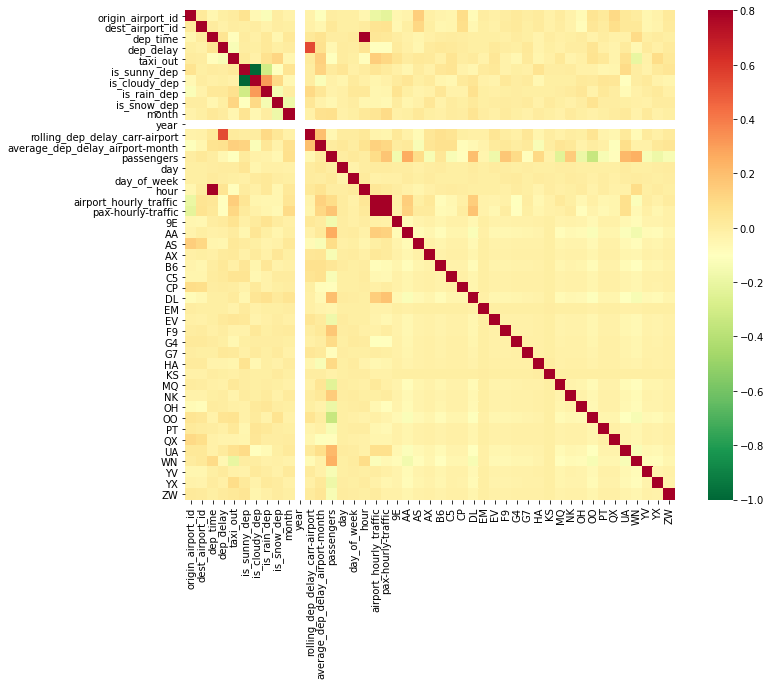

In [18]:
import seaborn as sns
corrmat = X_train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8, square=True, cmap = 'RdYlGn_r')

### KMEANS

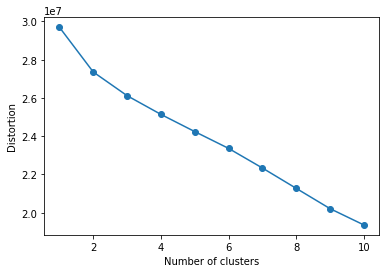

In [19]:
from sklearn.cluster import KMeans

def plot_distortion(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=10)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_distortion(Y_pca,max_clusters=10)

In [21]:
km = KMeans(n_clusters=2,init='k-means++',n_init=10,random_state=10)
y_km = km.fit_predict(Y_pca)
y_km

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
X_scaled['clusters'] = y_km
X_scaled.head()

,origin_airport_id,dest_airport_id,dep_time,dep_delay,taxi_out,is_sunny_dep,is_cloudy_dep,is_rain_dep,is_snow_dep,month,...,OH,OO,PT,QX,UA,WN,YV,YX,ZW,clusters
0,-1.656459,-1.534111,0.444670,-0.721316,0.340557,-0.885837,0.885837,-0.754530,-0.196455,-1.489975,...,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245,0
1,-1.656459,-1.534111,0.613679,-0.285187,0.218755,-0.885837,0.885837,1.325328,-0.196455,-1.489975,...,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245,0
2,-1.656459,-1.096391,0.444670,-0.146903,-0.938362,-0.885837,0.885837,1.325328,-0.196455,-1.489975,...,5.528617,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245,0
3,-1.656459,-1.096391,0.607714,0.299863,-0.694759,-0.885837,0.885837,-0.754530,-0.196455,-1.489975,...,5.528617,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245,0
4,-1.656459,0.809018,0.556017,-0.349011,-0.694759,1.128876,-1.128876,-0.754530,-0.196455,-1.489975,...,-0.180877,-0.33569,-0.11451,-0.113727,-0.314442,-0.420723,-0.180423,-0.200696,-0.114245,1


### DBSCAN

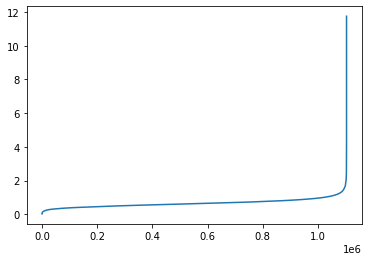

In [37]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Y_pca)
distances, indices = nbrs.kneighbors(Y_pca)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5,metric='euclidean')
y_db = db.fit_predict(Y_pca)
pd.DataFrame(y_db).iloc[:,0].value_counts()

-1       1060793
 670        6827
 1164       1883
 452         321
 1177        294
          ...   
 1731          2
 359           2
 2645          2
 1838          2
 4057          1
Name: 0, Length: 4269, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y)

In [48]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

colsample_bytree = [0.5]
learning_rate=[0.1]
max_depth=[15]
alpha = [0.01]
n_estimators=[100]
params = dict(objective=['multi:softprob'], colsample_bytree = colsample_bytree, learning_rate=learning_rate, max_depth=max_depth, alpha = alpha, n_estimators=n_estimators)

xgb_model = GridSearchCV(xgb.XGBClassifier(), param_grid=params, n_jobs=-1)
xgb_model.fit(X_train,y_train)

In [ ]:
print('Best parameters', xgb_model.best_params_)
y_pred_xgb = xgb_model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_xgb)*100)
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_xgb)
cnf_matrix

Baseline XGB = 68% accuracy

In [45]:
for i in range(5):
    y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:,i]
    fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_xgb_proba)
    auc = metrics.roc_auc_score(y_test,y_pred_xgb_proba)
    plt.plot(fpr,tpr,label = f'Class {i}, auc='+str(auc))
    plt.legend(loc=4)
    plt.show()

ValueError: multiclass format is not supported